# Loading dataset

In [1]:
import os, shutil
original_dataset_dir = '/home/shuvendu/Documents/datasets/Cat_and_Dog/train'
base_dir = '/home/shuvendu/Documents/datasets/Cat_and_Dog_small'

In [ ]:
os.mkdir(base_dir)

In [2]:
# Make the required datadir
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')


In [ ]:
os.mkdir(test_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Data Preprocessing

In [3]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/home/shuvendu/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


# Build the model

In [7]:
from keras import models, layers, metrics, losses, optimizers

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
# compile the model
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss = losses.binary_crossentropy,
              metrics = ['acc']
             )

# Training the model

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 61s - loss: 0.6898 - acc: 0.5345 - val_loss: 0.6782 - val_acc: 0.5650
Epoch 2/30
100/100 [==============================] - 5s - loss: 0.6562 - acc: 0.6130 - val_loss: 0.6573 - val_acc: 0.5890
Epoch 3/30
100/100 [==============================] - 5s - loss: 0.5986 - acc: 0.6925 - val_loss: 0.6134 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 5s - loss: 0.5559 - acc: 0.7070 - val_loss: 0.5988 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 5s - loss: 0.5308 - acc: 0.7430 - val_loss: 0.5746 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 5s - loss: 0.5084 - acc: 0.7450 - val_loss: 0.5739 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 5s - loss: 0.4862 - acc: 0.7735 - val_loss: 0.5721 - val_acc: 0.6940
Epoch 8/30
100/100 [==============================] - 5s - loss: 0.4603 - acc: 0.7835 - val_loss: 0.5361 - val_acc: 0.7120
Epoch 9/30
100/

In [11]:
# save the model
model.save('cats_and_dogs_small_1.h5')

# Plotting data for observatoin

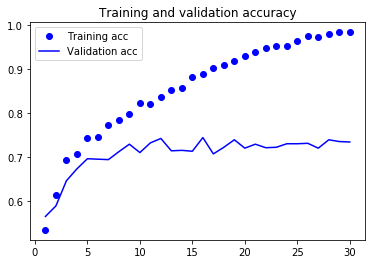

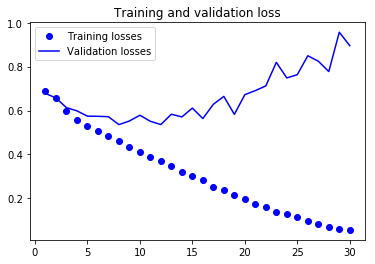

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Image augmentation: way of removing overfitting
The goal is that at training time,
your model will never see the exact same picture twice. This helps expose the model
to more aspects of the data and generalize better.

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# Add a dropout layer to the model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
# Retrain the model
history = model.fit_generator(train_generator, 
                              validation_data=validation_generator, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 16s - loss: 0.6958 - acc: 0.5100 - val_loss: 0.6821 - val_acc: 0.5216
Epoch 2/100
100/100 [==============================] - 15s - loss: 0.6820 - acc: 0.5662 - val_loss: 0.6555 - val_acc: 0.6321
Epoch 3/100
100/100 [==============================] - 15s - loss: 0.6694 - acc: 0.5884 - val_loss: 0.6428 - val_acc: 0.6288
Epoch 4/100
100/100 [==============================] - 15s - loss: 0.6476 - acc: 0.6147 - val_loss: 0.6098 - val_acc: 0.6753
Epoch 5/100
100/100 [==============================] - 16s - loss: 0.6282 - acc: 0.6413 - val_loss: 0.5964 - val_acc: 0.6561
Epoch 6/100
100/100 [==============================] - 15s - loss: 0.6138 - acc: 0.6531 - val_loss: 0.6008 - val_acc: 0.6611
Epoch 7/100
100/100 [==============================] - 15s - loss: 0.6004 - acc: 0.6616 - val_loss: 0.5630 - val_acc: 0.6991
Epoch 8/100
100/100 [==============================] - 15s - loss: 0.5865 - acc: 0.6900 - val_loss: 0.5681 - val_acc: 0.6834


100/100 [==============================] - 15s - loss: 0.4077 - acc: 0.8156 - val_loss: 0.4306 - val_acc: 0.8061
Epoch 67/100
100/100 [==============================] - 15s - loss: 0.4046 - acc: 0.8156 - val_loss: 0.4423 - val_acc: 0.8141
Epoch 68/100
100/100 [==============================] - 15s - loss: 0.3865 - acc: 0.8247 - val_loss: 0.6020 - val_acc: 0.7354
Epoch 69/100
100/100 [==============================] - 16s - loss: 0.3956 - acc: 0.8153 - val_loss: 0.3984 - val_acc: 0.8138
Epoch 70/100
100/100 [==============================] - 15s - loss: 0.3969 - acc: 0.8216 - val_loss: 0.4399 - val_acc: 0.8033
Epoch 71/100
100/100 [==============================] - 16s - loss: 0.3959 - acc: 0.8206 - val_loss: 0.3954 - val_acc: 0.8247
Epoch 72/100
100/100 [==============================] - 15s - loss: 0.3937 - acc: 0.8259 - val_loss: 0.4071 - val_acc: 0.8287
Epoch 73/100
100/100 [==============================] - 15s - loss: 0.3951 - acc: 0.8247 - val_loss: 0.4013 - val_acc: 0.8211
Epoch

In [17]:
model.save('cats_and_dogs_small_2.h5')

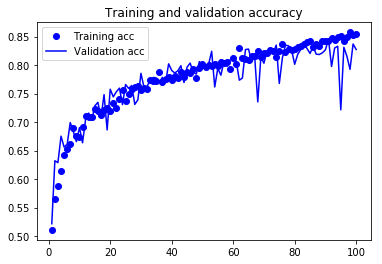

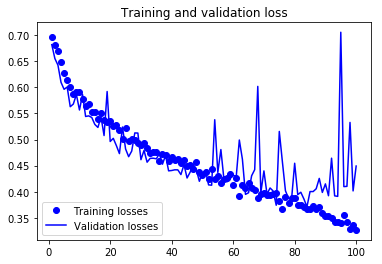

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()